In [1]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
google_data = pd.read_csv("GOOG.csv")

In [3]:
google_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,46.586498,46.820499,46.181000,46.797501,46.797501,24254000
1,2017-09-08,46.824501,46.849499,46.243999,46.325001,46.325001,20230000
2,2017-09-11,46.712502,46.918999,46.346001,46.453999,46.453999,25340000
3,2017-09-12,46.629501,46.674000,46.193050,46.603500,46.603500,22688000
4,2017-09-13,46.533001,46.862499,46.493000,46.754501,46.754501,22052000


In [4]:
google_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
google_data["Date"] = pd.to_datetime(google_data['Date'])
google_data['Date'] = pd.to_datetime(google_data['Date'], format='%Y-%m-%d')


In [6]:
google_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
google_data["Open"]

0        46.586498
1        46.824501
2        46.712502
3        46.629501
4        46.533001
           ...    
1253    111.029999
1254    111.629997
1255    109.199997
1256    111.339996
1257    108.135002
Name: Open, Length: 1258, dtype: float64

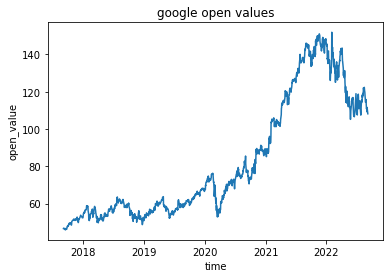

In [8]:
google_data_open = google_data.iloc[:,1].values
plt.plot(google_data["Date"],google_data_open)
plt.xlabel("time")
plt.ylabel("open_value")
plt.title("google open values")
plt.show()

In [9]:
google_data_open = google_data_open.reshape(-1,1)
google_data_open = google_data_open.astype("float32")
google_data_open.shape

(1258, 1)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
google_data_open = scaler.fit_transform(google_data_open)

In [11]:
train_size = int(len(google_data_open) * 0.50)
test_size = len(google_data_open) - train_size
train = google_data_open[0:train_size, :]
test = google_data_open[train_size:len(google_data_open),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 629, test size: 629 


In [12]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
    
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)

In [13]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [14]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
print(trainX.shape)
print(testX.shape)

(618, 1, 10)
(618, 1, 10)


In [16]:
print(trainY.shape)
print(testY.shape)

(618,)
(618,)


In [17]:
from keras.layers import Dropout

In [18]:
"""# model
model = Sequential()
model.add(LSTM(40, return_sequences = True ,input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dropout(0.2))
model.add(LSTM(units = 40,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 40,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 40))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32)

Train Score: 1.14 RMSE
Test Score: 24.19 RMSE

"""

"# model\nmodel = Sequential()\nmodel.add(LSTM(40, return_sequences = True ,input_shape=(1, time_stemp))) # 10 lstm neuron(block)\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units = 40,return_sequences = True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units = 40,return_sequences = True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units = 40))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1))\nmodel.compile(loss='mean_squared_error', optimizer='adam')\nmodel.fit(trainX, trainY, epochs=100, batch_size=32)\n\nTrain Score: 1.14 RMSE\nTest Score: 24.19 RMSE\n\n"

In [19]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
618/618 [==============================] - 3s 1ms/step - loss: 5.1112e-04
Epoch 2/50
618/618 [==============================] - 1s 1ms/step - loss: 2.0936e-04
Epoch 3/50
618/618 [==============================] - 1s 1ms/step - loss: 1.9048e-04
Epoch 4/50
618/618 [==============================] - 1s 1ms/step - loss: 1.6538e-04
Epoch 5/50
618/618 [==============================] - 1s 1ms/step - loss: 1.5262e-04
Epoch 6/50
618/618 [==============================] - 1s 1ms/step - loss: 1.4679e-04
Epoch 7/50
618/618 [==============================] - 1s 1ms/step - loss: 1.3327e-04
Epoch 8/50
618/618 [==============================] - 1s 1ms/step - loss: 1.3139e-04
Epoch 9/50
618/618 [==============================] - 1s 1ms/step - loss: 1.3017e-04
Epoch 10/50
618/618 [==============================] - 1s 1ms/step - loss: 1.1794e-04
Epoch 11/50
618/618 [==============================] - 1s 1ms/step - loss: 1.1970e-04
Epoch 12/50
618/618 [==============================] - 1s 1ms/s

Train Score: 0.96 RMSE
Test Score: 8.85 RMSE

In [20]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

20/20 [==============================] - 0s 1ms/step
Train Score: 1.04 RMSE
Test Score: 8.72 RMSE


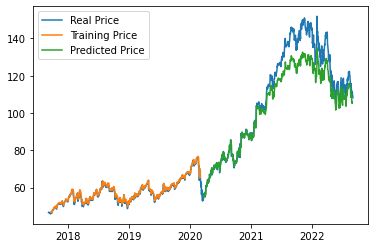

In [21]:
# shifting train
trainPredictPlot = numpy.empty_like(google_data_open)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(google_data_open)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(google_data_open)-1, :] = testPredict
# plot baseline and predictions
plt.plot(google_data["Date"],scaler.inverse_transform(google_data_open), label = "Real Price")
plt.plot(google_data["Date"],trainPredictPlot, label="Training Price")
plt.plot(google_data["Date"],testPredictPlot, label="Predicted Price")
plt.legend()
plt.show()

In [22]:
trainX.shape

(618, 1, 10)

In [26]:
google_data.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2022-07-26,107.430000,107.739998,104.760002,105.440002,105.440002,36626600
1229,2022-07-27,109.599998,114.400002,108.419998,113.599998,113.599998,41474600
1230,2022-07-28,112.800003,114.699997,111.850998,114.589996,114.589996,23303800
1231,2022-07-29,113.400002,116.900002,113.230003,116.639999,116.639999,31336200
1232,2022-08-01,115.529999,117.120003,114.690002,115.480003,115.480003,22856200
1233,2022-08-02,114.430000,117.080002,114.260002,115.900002,115.900002,17911000
1234,2022-08-03,116.339996,119.419998,116.150002,118.779999,118.779999,25302800
1235,2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700
1236,2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15607600
1237,2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100


In [39]:
# Assuming you have data up to the end of 2021
# Extract the last 'time_stemp' data points from the training data
last_sequence = google_data_open[-time_stemp:]

# Create an empty list to store the predicted values
predicted_values = []

# Number of months to predict (assuming you want to predict the 9th and 10th months of 2022)
num_months_to_predict = 2

# Loop through the number of months you want to predict
for month in range(num_months_to_predict):
    # Reshape the last_sequence to match the input shape of the model (samples, timesteps, features)
    last_sequence_reshaped = last_sequence.reshape(1, 1, time_stemp)

    # Predict the next value for the current sequence
    predicted_value = model.predict(last_sequence_reshaped)

    # Append the predicted value to the predicted_values list
    predicted_values.append(predicted_value[0, 0])

    # Update the last_sequence with the predicted value for the next iteration
    last_sequence = np.append(last_sequence[1:], predicted_value)

# Inverse transform the predicted values to get the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))


1/1 [==============================] - 0s 16ms/step


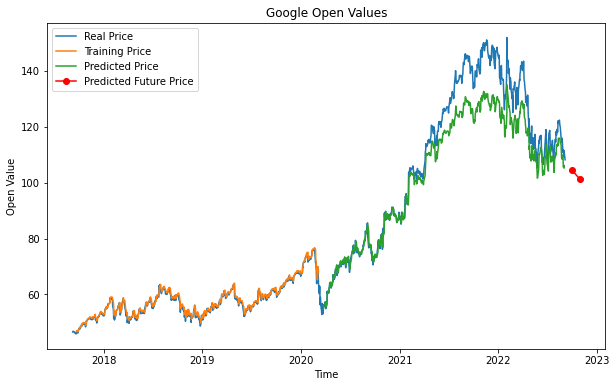

In [40]:
import matplotlib.pyplot as plt

# Generate the months for the predicted data
predicted_months = pd.date_range(start='2022-09-01', periods=num_months_to_predict, freq='M')

# Create a new plot to display the predictions
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(google_data["Date"], scaler.inverse_transform(google_data_open), label="Real Price")

# Plot the training data
plt.plot(google_data["Date"], trainPredictPlot, label="Training Price")

# Plot the test data
plt.plot(google_data["Date"], testPredictPlot, label="Predicted Price")

# Plot the predicted values for the 9th and 10th months of 2022
plt.plot(predicted_months, predicted_values, label="Predicted Future Price", marker='o', color='r')

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Open Value")
plt.title("Google Open Values")
plt.legend()

# Show the plot
plt.show()
